# Lab 2: What Should I Eat?

You're going to build an agent that:
1. **Sees** a photo of your fridge or pantry
2. **Identifies** what ingredients are available
3. **Searches** the web for recipes using those ingredients
4. **Recommends** what you should make

This combines everything from notebooks 101 and 102:
- Tools (101)
- Vision + Web Search (102) + Web Fetch (102)

## Setup

Run these cells to get started.

In [14]:
from pathlib import Path
from dotenv import load_dotenv

load_dotenv(Path.cwd() / ".env")

True

In [16]:
from agents import Agent
from omniagents import Runner
from omniagents.builtin.tools import web_search, web_fetch, read_image
from agents import function_tool


---

## Part 1: Understand the Tools

Before building the agent, let's understand what tools we have.

| Tool | What it does | Example use |
|------|--------------|-------------|
| `read_image` | Looks at an image and describes what it sees | Identify ingredients in a photo |
| `web_search` | Searches the web and returns results | Find recipes for "chicken and broccoli" |
| `web_fetch` | Fetches the full content of a webpage | Get the actual recipe from a URL |

---

## Part 2: Write the Instructions

The instructions tell the agent:
- What it is
- What tools it has
- How to approach the task

**Your job:** Fill in the `INSTRUCTIONS` below.

Hints:
- Tell it to use `read_image` first to see what ingredients are available
- Tell it to use `web_search` to find recipes
- Tell it what kind of recommendations to give (quick meals? healthy? comfort food?)

In [20]:
from agents import function_tool


INSTRUCTIONS = """
You are a helpful cooking assistant.

When the user shows you a photo of their fridge or pantry:

1. First, use read_image to see what ingredients are available

2. Then go online and find recepipes that can be made with those ingredients using web_search and web_fetch.

3. Finally return a list of recipe suggestions to the user.

Always take into account the user's dietary preferences and restrictions: read the user's dietary preferences and restrictions from file using the read_user_preferences tool.

"""

@function_tool
def read_user_preferences() -> str:
    """Read the user's dietary preferences and restrictions from file."""
    try:
        with open("examples/lab2/user_preferences.txt") as f:
            return f.read()
    except FileNotFoundError:
        return "No preferences file found."

---

## Part 3: Create the Agent

Now create the agent with:
- A name
- Your instructions
- The tools it needs
- A model (use `gpt-5.2` for vision)

In [21]:
chef = Agent(
    name="chef",  # YOUR TURN: Give it a name
    instructions=INSTRUCTIONS,
    tools=[read_image, web_search, web_fetch, read_user_preferences],  # YOUR TURN: What tools does it need?
    model="gpt-5.2",
)

---

## Part 4: Test It!

We've provided a sample fridge photo. Run the agent and see what it recommends.

![Sample Fridge](examples/lab2/fridge.jpg)

API request failed: <!doctype html>
<html lang="en">
<head>
  <title>Server Error (500)</title>
</head>
<body>
  <h1>Server Error (500)</h1><p></p>
</body>
</html>
Traceback (most recent call last):
  File "/Users/snpr/Code/AI-Agents-Spring26/ClassWork/labs-1-2/.venv/lib/python3.14/site-packages/omniagents/core/runtime/bridge.py", line 481, in stream_agent
    async for event in result.stream_events():
    ...<232 lines>...
            )
  File "/Users/snpr/Code/AI-Agents-Spring26/ClassWork/labs-1-2/.venv/lib/python3.14/site-packages/agents/result.py", line 270, in stream_events
    raise self._stored_exception
  File "/Users/snpr/Code/AI-Agents-Spring26/ClassWork/labs-1-2/.venv/lib/python3.14/site-packages/agents/run.py", line 1012, in _start_streaming
    turn_result = await cls._run_single_turn_streamed(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<9 lines>...
    )
    ^
  File "/Users/snpr/Code/AI-Agents-Spring26/ClassWork/labs-1-2/.venv/lib/python3.14/site-packa
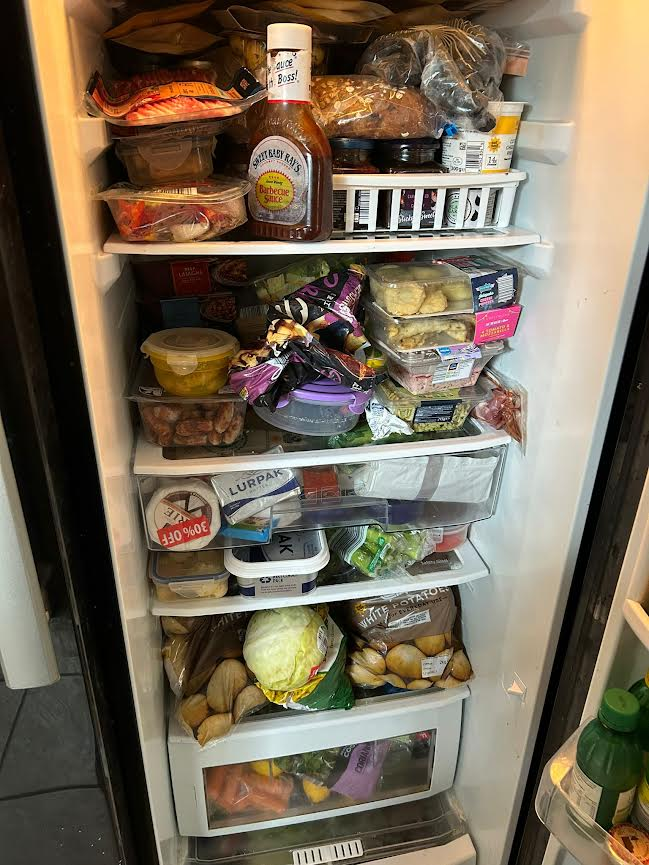
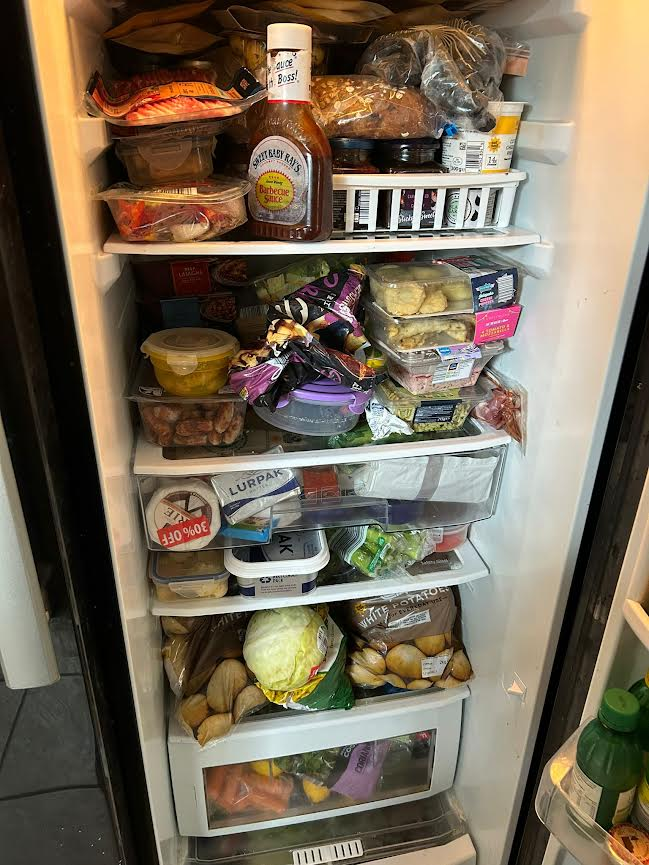
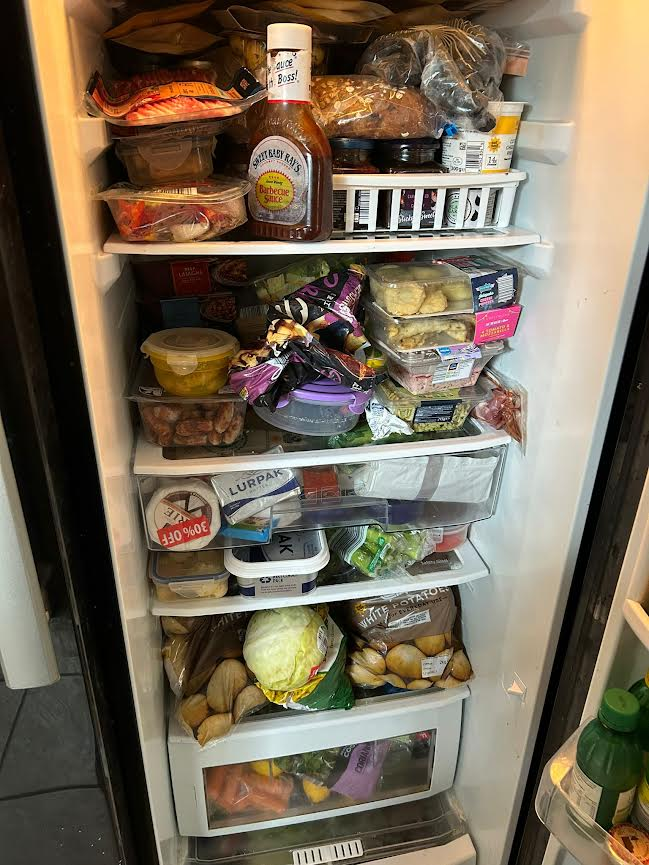
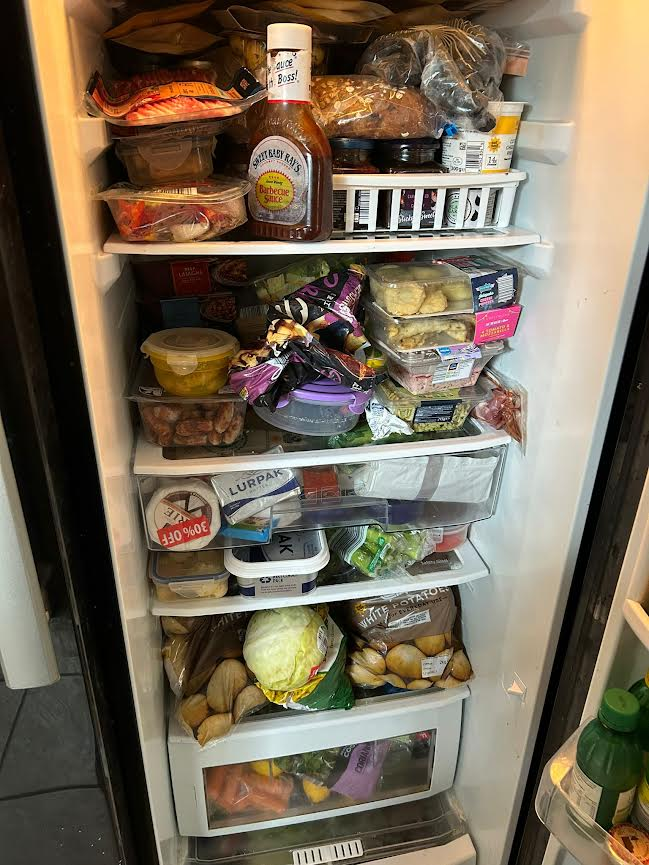
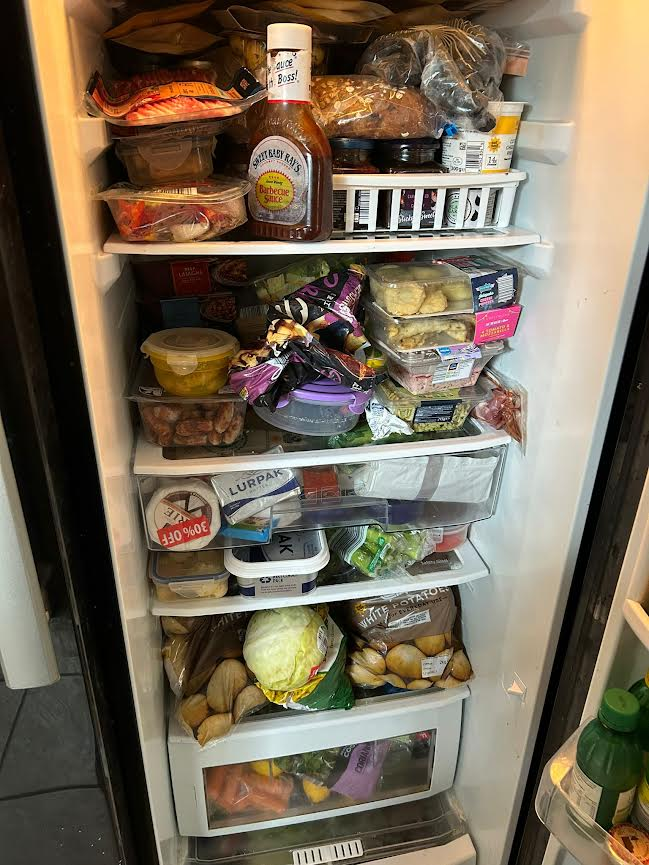
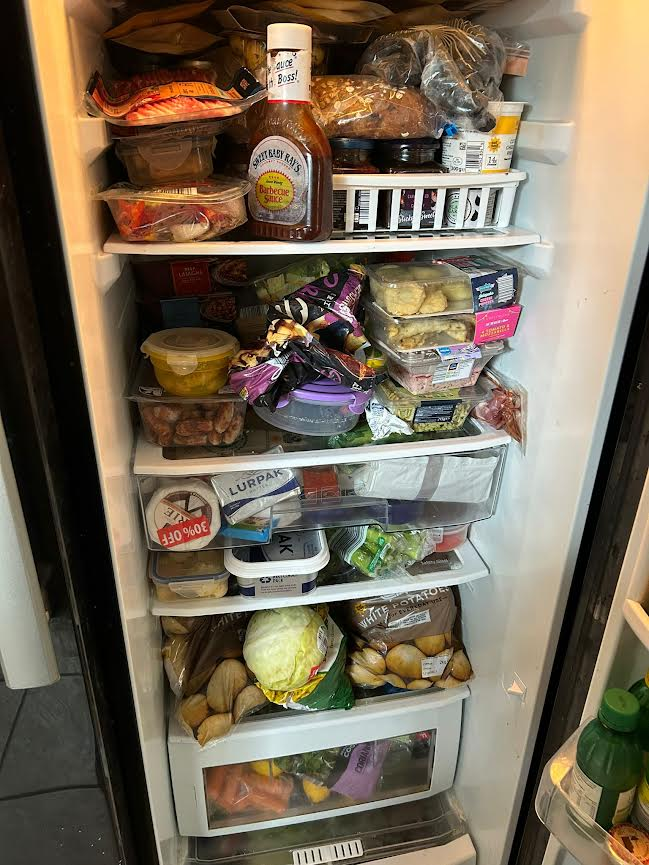
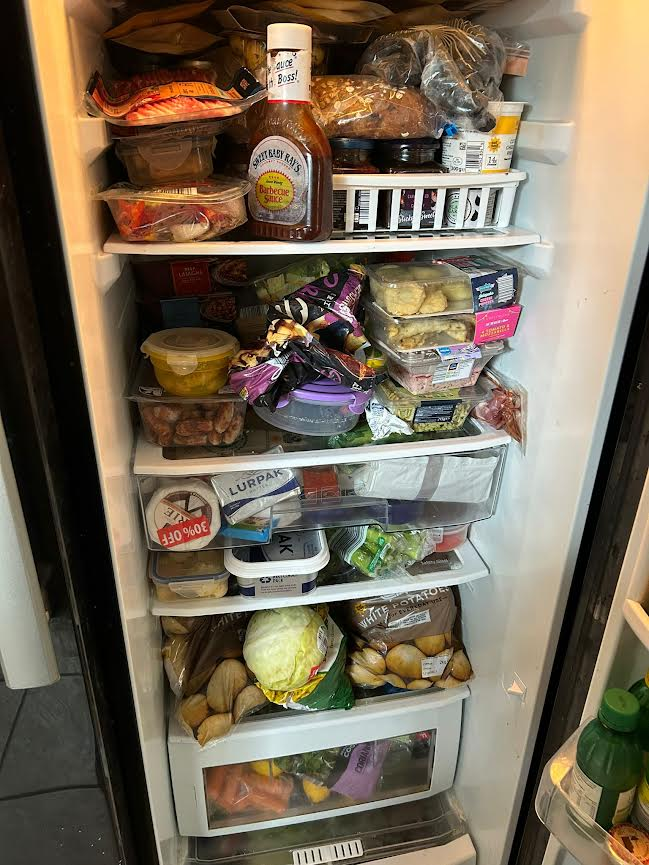
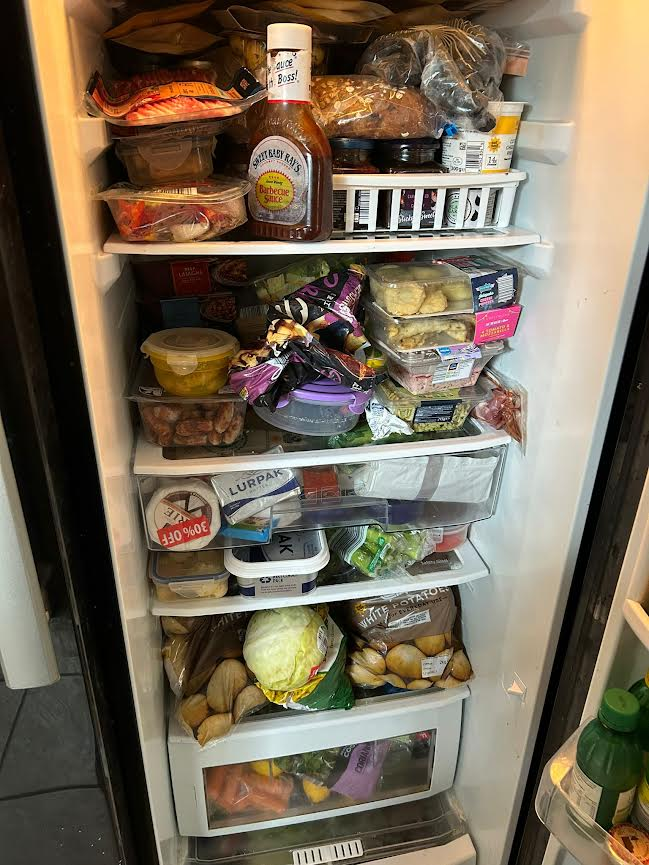
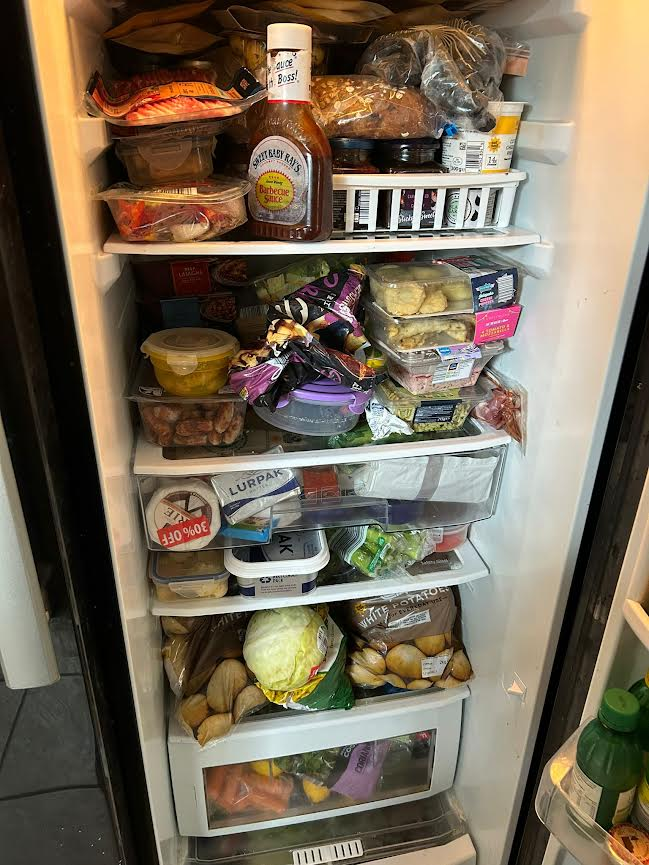
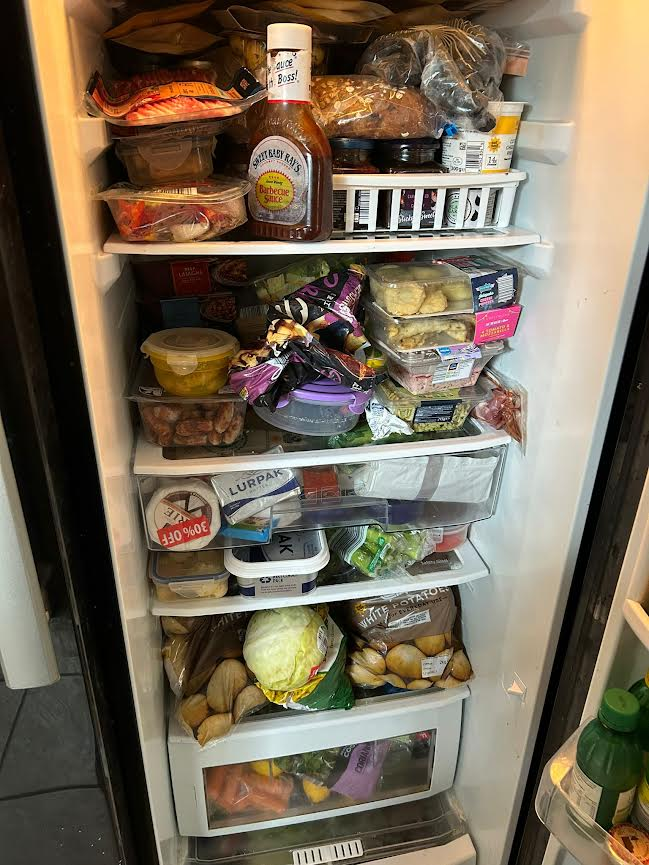

In [ ]:
runner = Runner.from_agent(chef)
runner.run_notebook(input="What should I make for dinner? Here's what I have: examples/lab2/fridge.jpg")

---

## Part 5: Iterate!

Did it work? Probably not perfectly on the first try. That's normal!

Things to try:
- **Be more specific in your instructions** - tell it exactly what steps to follow
- **Add constraints** - "only suggest recipes with 5 ingredients or less"
- **Change the personality** - make it a Gordon Ramsay type, or a gentle grandma

Go back to Part 2, edit your instructions, and run again.

---

## Part 6: Try Your Own Photo

Take a photo of your own fridge, pantry, or even a restaurant menu!

Upload it to the `examples/` folder and update the path below.

In [ ]:
runner = Runner.from_agent(chef)
runner.run_notebook(input="What should I make? examples/lab2/YOUR_PHOTO_HERE.jpg")

---

## Stretch Goals

Done early? Try one of these:

### Add dietary restrictions
Modify your instructions so the agent asks about dietary restrictions (vegetarian, gluten-free, allergies) before recommending recipes.

### Add a new tool
We've provided a function that reads user preferences from a file:

```python
def read_user_preferences() -> str:
    """Read the user's dietary preferences and restrictions from file."""
    try:
        with open("examples/lab2/user_preferences.txt") as f:
            return f.read()
    except FileNotFoundError:
        return "No preferences file found."
```

**Your challenge:** 
1. Turn this into a tool the agent can use (hint: look at notebook 101)
2. Add it to your agent's tools list
3. Update your instructions to tell the agent to check preferences before recommending

### Make it judge your fridge
Add instructions that make the agent comment on the state of your fridge. Is it well-stocked? Are there expired items visible? Does it need a clean?

---

## Free Play

Use this cell to chat freely with your agent.

In [ ]:
runner = Runner.from_agent(chef)
runner.run_notebook()

---

## Reflection

Before you finish, think about:

1. What surprised you about how the agent behaved?
2. What was harder than you expected?
3. What would you add if you had more time?